## Monthly Plots Generator

The codeblock below is used to generate monthly-plots for the filtered repos

/tmp/ipykernel_1024689/3619653918.py:32: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  group['year_month'] = group['starred_at'].dt.to_period('M')
/tmp/ipykernel_1024689/3619653918.py:33: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  fake_group['year_month'] = fake_group['starred_at'].dt.to_period('M')
/tmp/ipykernel_1024689/3619653918.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_group['year_month'] = fake_group['starred_at'].dt.to_period('M')
/tmp/ipykernel_1024689/3619653918.py:40: UserWarning: Converting to Period representation will drop timezone information.
  min_date = group["starred_at"].min().to_period('M')
/tmp/ipykernel_1024689/

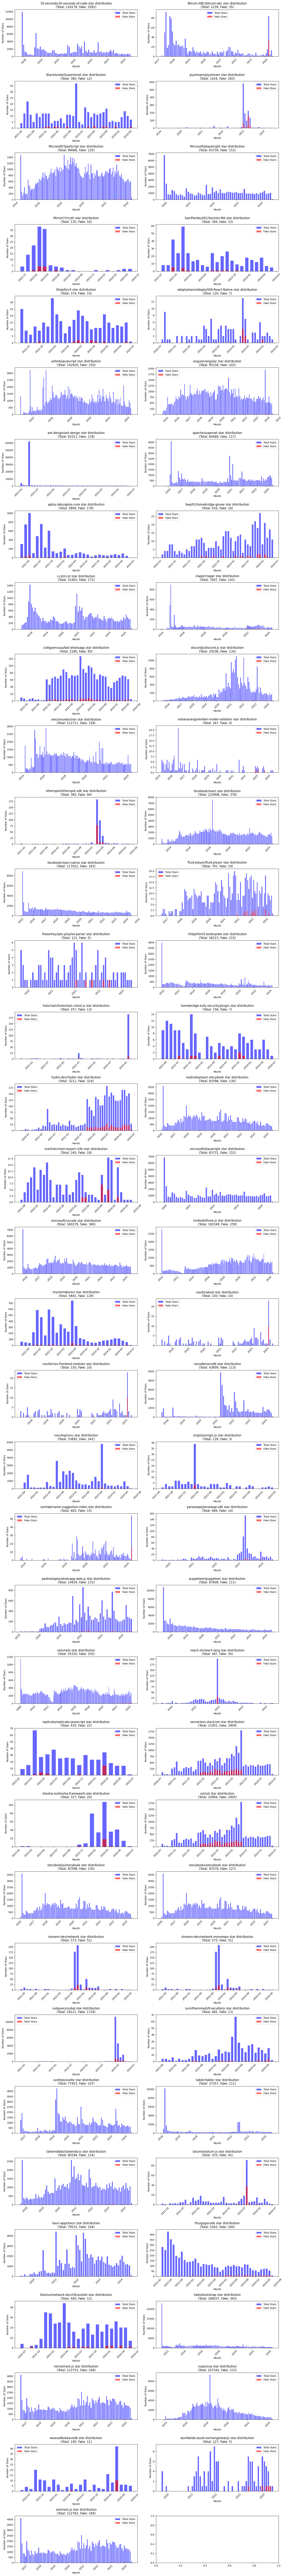

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files into DataFrames
df_fake = pd.read_csv('data/filtered_repos_fake_users.csv')
df_total = pd.read_csv('data/filtered_repos_total_users.csv')

# Convert the 'starred_at' field to datetime
df_fake['starred_at'] = pd.to_datetime(df_fake['starred_at'], utc = True)
df_total['starred_at'] = pd.to_datetime(df_total['starred_at'], utc = True)

# Group the data by 'github' name
fake_grouped = df_fake.groupby("github")
total_grouped = df_total.groupby("github")

# Determine the number of unique 'github' names
num_githubs = len(total_grouped)

# Determine the grid size for subplots
rows = (num_githubs // 2) + (num_githubs % 2)
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

# Iterate over each group and plot on the respective subplot
for ax, (github, group) in zip(axes, total_grouped):
    fake_group = fake_grouped.get_group(github) if github in fake_grouped.groups else pd.DataFrame(columns=df_fake.columns)

    # Extract month and year from 'starred_at' field for total and fake groups
    group['year_month'] = group['starred_at'].dt.to_period('M')
    fake_group['year_month'] = fake_group['starred_at'].dt.to_period('M')

    # Count the number of occurrences per month for total and fake groups
    monthly_counts_total = group['year_month'].value_counts().sort_index()
    monthly_counts_fake = fake_group['year_month'].value_counts().sort_index()

    # Determine the overall date range
    min_date = group["starred_at"].min().to_period('M')
    max_date = group["starred_at"].max().to_period('M')
    all_months = pd.period_range(start=min_date, end=max_date, freq='M')

    # Reindex to include all months in the range
    monthly_counts_total = monthly_counts_total.reindex(all_months, fill_value=0)
    monthly_counts_fake = monthly_counts_fake.reindex(all_months, fill_value=0)

    # Plot the distribution
    ax.bar(monthly_counts_total.index.to_timestamp(), monthly_counts_total.values, color='blue', alpha=0.6, width=20, label='Total Stars')
    ax.bar(monthly_counts_fake.index.to_timestamp(), monthly_counts_fake.values, color='red', alpha=0.6, width=20, label='Fake Stars')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Stars')

    # Calculate total stars and total fake stars
    total_stars = monthly_counts_total.sum()
    fake_stars = monthly_counts_fake.sum()

    # Update title to include total stars and fake stars
    ax.set_title(f'{github} star distribution\n(Total: {total_stars}, Fake: {fake_stars})')
    
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Daily Plots Generator

The codeblock below is used to generate the daily plot of the Peak Month of a specific repo

/tmp/ipykernel_1024689/2494757454.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  total_period_data['date'] = total_period_data['starred_at'].dt.to_period('D')
/tmp/ipykernel_1024689/2494757454.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_period_data['date'] = total_period_data['starred_at'].dt.to_period('D')
/tmp/ipykernel_1024689/2494757454.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  fake_period_data['date'] = fake_period_data['starred_at'].dt.to_period('D')


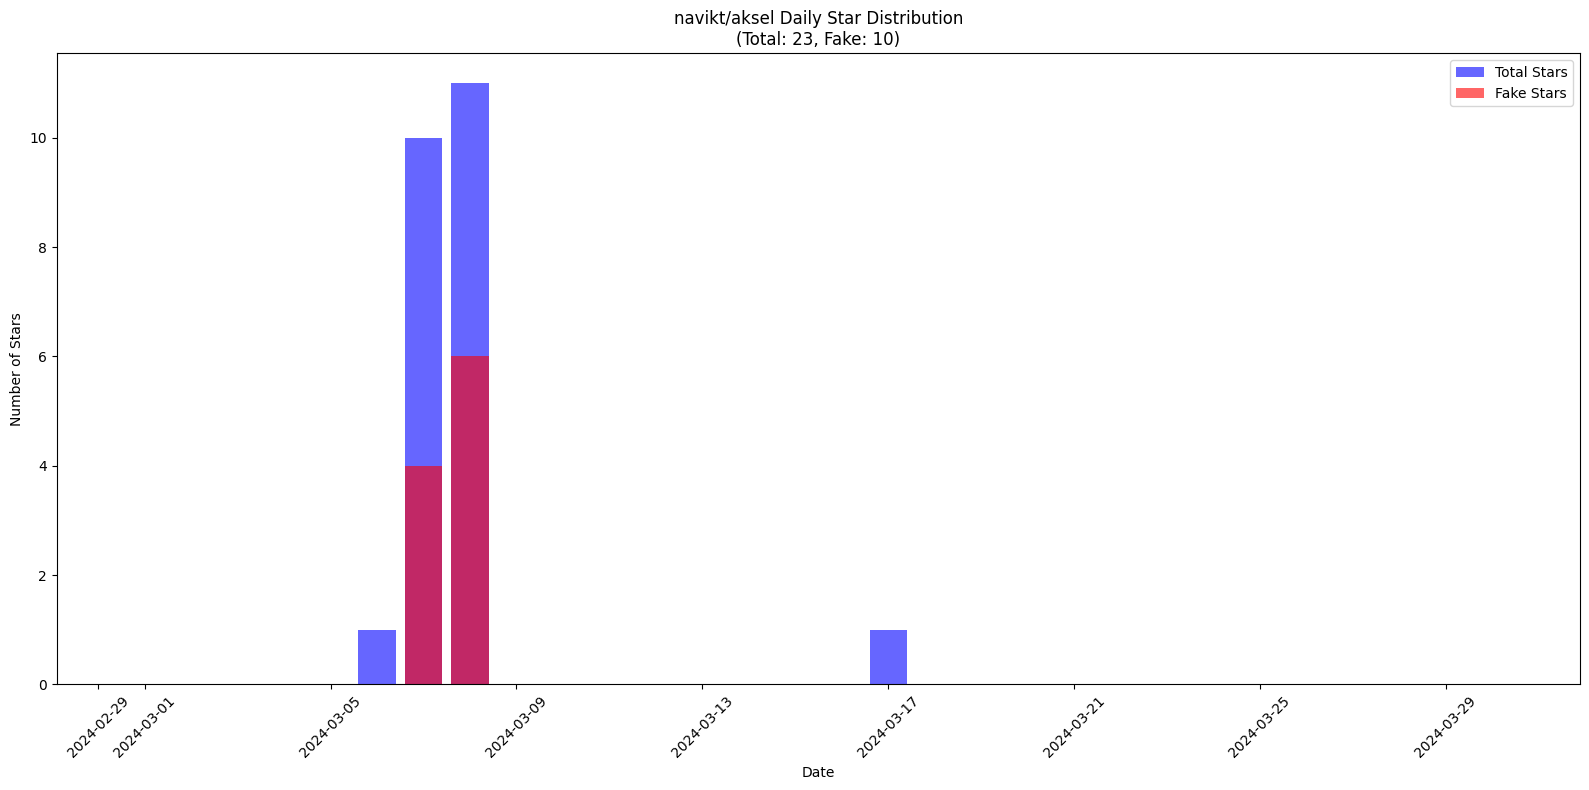

In [30]:
# Specify the GitHub repository to plot
repo_name = 'navikt/aksel'  

# Filter the data for the specified repository
total_repo_data = df_total[df_total['github'] == repo_name]
fake_repo_data = df_fake[df_fake['github'] == repo_name]

# Specify the date range for the plot
start_date = '2024-03-01'  # Replace with the desired start date
end_date = '2024-03-30'    # Replace with the desired end date

# Filter data for the specified date range
total_period_data = total_repo_data[(total_repo_data['starred_at'] >= start_date) & (total_repo_data['starred_at'] <= end_date)]
fake_period_data = fake_repo_data[(fake_repo_data['starred_at'] >= start_date) & (fake_repo_data['starred_at'] <= end_date)]

# Extract day from 'starred_at' field for total and fake groups
total_period_data['date'] = total_period_data['starred_at'].dt.to_period('D')
fake_period_data['date'] = fake_period_data['starred_at'].dt.to_period('D')

# Count the number of occurrences per day for total and fake groups
daily_counts_total = total_period_data['date'].value_counts().sort_index()
daily_counts_fake = fake_period_data['date'].value_counts().sort_index()

# Determine the overall date range
all_days = pd.period_range(start=start_date, end=end_date, freq='D')

# Reindex to include all days in the range
daily_counts_total = daily_counts_total.reindex(all_days, fill_value=0)
daily_counts_fake = daily_counts_fake.reindex(all_days, fill_value=0)

# Plot the distribution
plt.figure(figsize=(16, 8))
plt.bar(daily_counts_total.index.to_timestamp(), daily_counts_total.values, color='blue', alpha=0.6, width=0.8, label='Total Stars')
plt.bar(daily_counts_fake.index.to_timestamp(), daily_counts_fake.values, color='red', alpha=0.6, width=0.8, label='Fake Stars')
plt.xlabel('Date')
plt.ylabel('Number of Stars')

# Calculate total stars and total fake stars
total_stars = daily_counts_total.sum()
fake_stars = daily_counts_fake.sum()

# Update title to include total stars and fake stars
plt.title(f'{repo_name} Daily Star Distribution\n(Total: {total_stars}, Fake: {fake_stars})')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Hourly Plots Generator

The codeblock below is used to generate the hourly plot of the Peak Day of a specific repo

/tmp/ipykernel_1024689/2158853313.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  total_period_data['date_hour'] = total_period_data['starred_at'].dt.to_period('H')
/tmp/ipykernel_1024689/2158853313.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_period_data['date_hour'] = total_period_data['starred_at'].dt.to_period('H')
/tmp/ipykernel_1024689/2158853313.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  fake_period_data['date_hour'] = fake_period_data['starred_at'].dt.to_period('H')


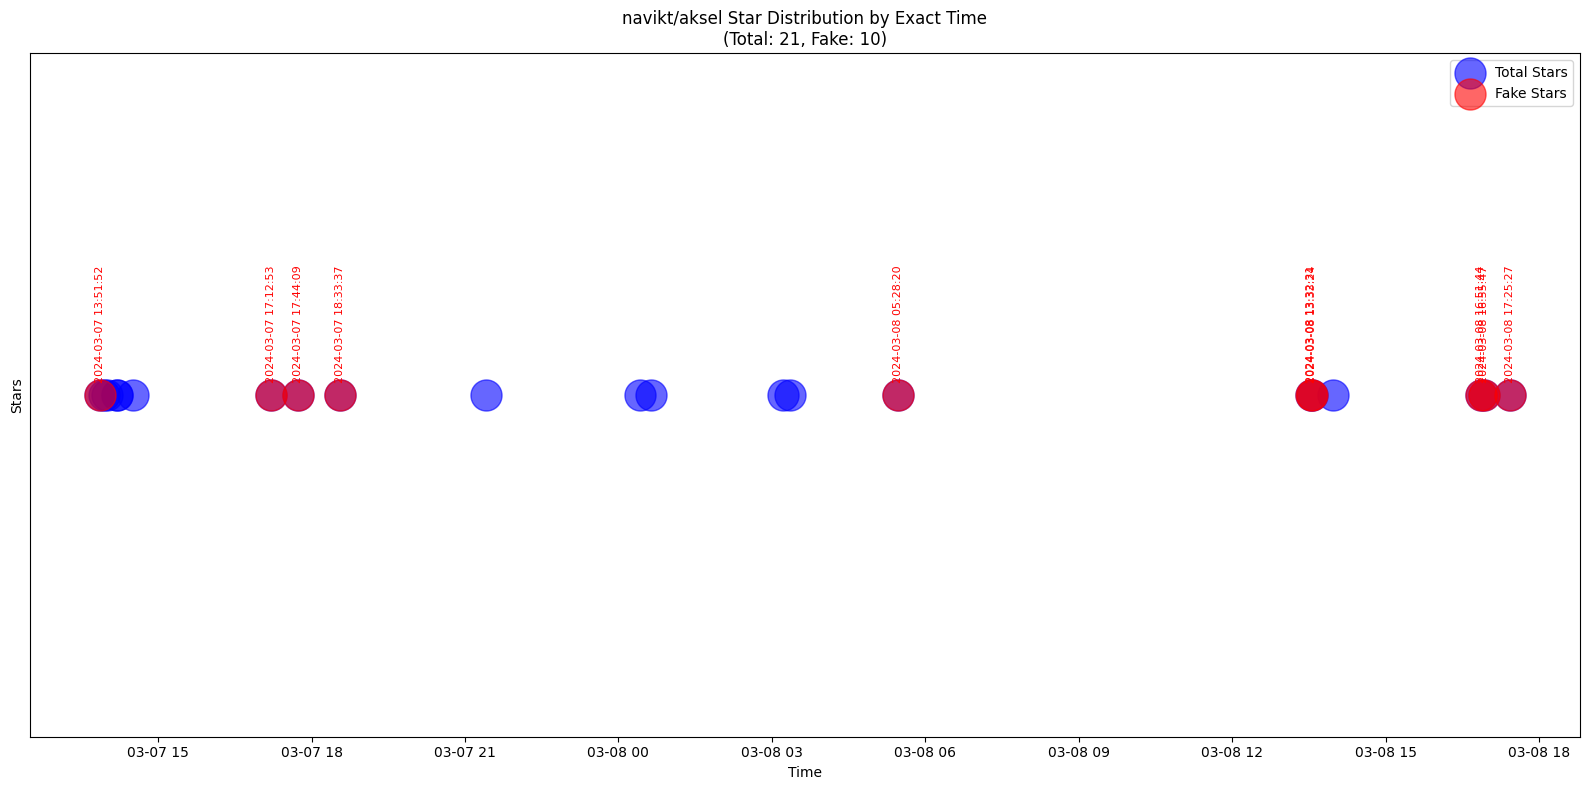

In [31]:
# Specify the GitHub repository to plot
repo_name = 'navikt/aksel'  # Replace with the actual GitHub repo name

# Filter the data for the specified repository
total_repo_data = df_total[df_total['github'] == repo_name]
fake_repo_data = df_fake[df_fake['github'] == repo_name]

# Specify the date range for the plot
start_date = '2024-03-07'  # Replace with the desired start date
end_date = '2024-03-09'    # Replace with the desired end date

# Filter data for the specified date range
total_period_data = total_repo_data[(total_repo_data['starred_at'] >= start_date) & (total_repo_data['starred_at'] <= end_date)]
fake_period_data = fake_repo_data[(fake_repo_data['starred_at'] >= start_date) & (fake_repo_data['starred_at'] <= end_date)]

# Extract hour from 'starred_at' field for total and fake groups
total_period_data['date_hour'] = total_period_data['starred_at'].dt.to_period('H')
fake_period_data['date_hour'] = fake_period_data['starred_at'].dt.to_period('H')

# Plot the distribution
plt.figure(figsize=(16, 8))
plt.scatter(total_period_data['starred_at'], [1] * len(total_period_data), color='blue', alpha=0.6, label='Total Stars', s = 500)
plt.scatter(fake_period_data['starred_at'], [1] * len(fake_period_data), color='red', alpha=0.6, label='Fake Stars', s = 500)
# Add annotations for fake stars
for idx, row in fake_period_data.iterrows():
    plt.annotate(row['starred_at'].strftime('%Y-%m-%d %H:%M:%S'), (row['starred_at'], 1), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='red', rotation = 90)
plt.xlabel('Time')
plt.ylabel('Stars')
plt.yticks([])  # Hide y-axis ticks as they are not meaningful in this context

# Calculate total stars and total fake stars
total_stars = len(total_period_data)
fake_stars = len(fake_period_data)

# Update title to include total stars and fake stars
plt.title(f'{repo_name} Star Distribution by Exact Time\n(Total: {total_stars}, Fake: {fake_stars})')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()